In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
#Load the data

In [4]:
data = pd.read_csv('20 Country+clusters.csv')

In [5]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

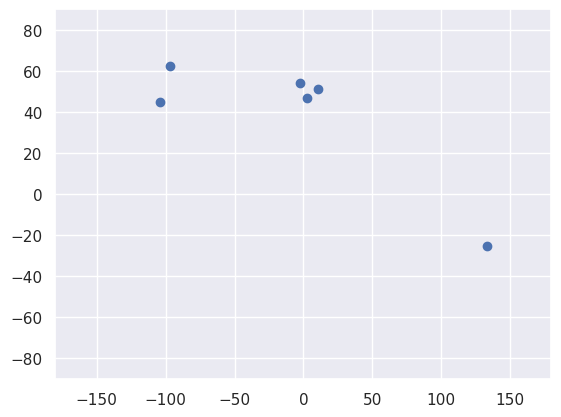

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [7]:
#Select the features

In [8]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [9]:
#Clustering

In [28]:
kmeans = KMeans(2)

In [29]:
# KMeans(2) is the number of cluster we want in this case is 2 cluster

In [30]:
kmeans.fit(x)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [31]:
#Clustering results

In [32]:
identify_clusters = kmeans.fit_predict(x)
identify_clusters

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 0])

In [33]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identify_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<function matplotlib.pyplot.show(close=None, block=None)>

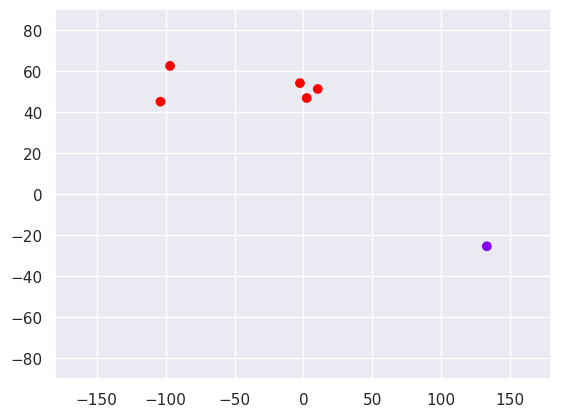

In [34]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [35]:
#Selecting the numbers of clusters

In [36]:
# WCSS

In [37]:
kmeans.inertia_

13205.758119999999

In [38]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [39]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

In [40]:
number_clusters = range(1,7)

Text(0, 0.5, 'within-clusters sum of square')

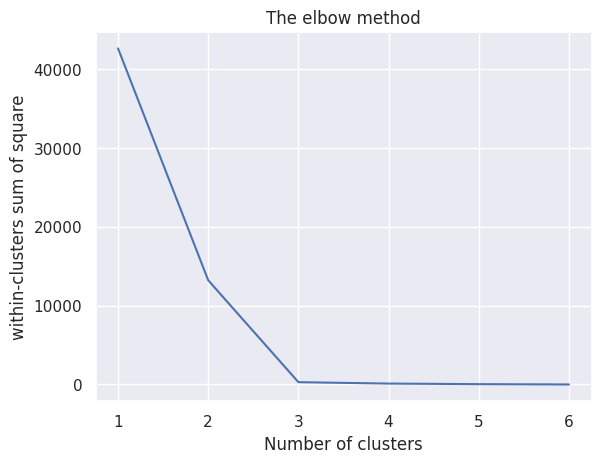

In [41]:
plt.plot(number_clusters, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-clusters sum of square')

In [42]:
#The better solutions is 3 cluster